In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [2]:
tracks = pd.read_csv('/content/tracks.csv')
tracks.head()


,track,trackid,track_uri,album_name,album_id,artist,duration,explicit,popularity,danceability,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Eyes of Abomination,0DL7M9oumLz11bI0oKiILH,4PZPvAEhMw6zCsGQlqsYpw,Amaranthine Redolence,0DL7M9oumLz11bI0oKiILH,Malodorous,126000,True,22,0.307,...,0.194000,0.121,0.2270,67.850,audio_features,spotify:track:4PZPvAEhMw6zCsGQlqsYpw,https://api.spotify.com/v1/tracks/4PZPvAEhMw6z...,https://api.spotify.com/v1/audio-analysis/4PZP...,126000,4
1,You Can't Stop Me,4bIPDNw0hV5AdoJXi7zMXd,7FbrgGvv5ToVhdQpMsY3FU,You Can't Stop Me,4bIPDNw0hV5AdoJXi7zMXd,Suicide Silence,247840,True,44,0.234,...,0.048500,0.121,0.1760,173.400,audio_features,spotify:track:7FbrgGvv5ToVhdQpMsY3FU,https://api.spotify.com/v1/tracks/7FbrgGvv5ToV...,https://api.spotify.com/v1/audio-analysis/7Fbr...,247840,4
2,Fuck Everything,3oJKuFPVZTSeNc8G4UYV4L,005drRcJJFgFHgtxSJJO0v,The Black Crown,3oJKuFPVZTSeNc8G4UYV4L,Suicide Silence,273613,True,49,0.479,...,0.000507,0.370,0.1930,94.122,audio_features,spotify:track:005drRcJJFgFHgtxSJJO0v,https://api.spotify.com/v1/tracks/005drRcJJFgF...,https://api.spotify.com/v1/audio-analysis/005d...,273613,4
3,Where Shadows Forever Reign,2vhEmSXSLMOcIlkvAF09zp,3K3aBG0PLVjlI7WdmYazak,Where Shadows Forever Reign,2vhEmSXSLMOcIlkvAF09zp,Dark Funeral,332974,False,14,0.413,...,0.443000,0.212,0.0295,110.036,audio_features,spotify:track:3K3aBG0PLVjlI7WdmYazak,https://api.spotify.com/v1/tracks/3K3aBG0PLVjl...,https://api.spotify.com/v1/audio-analysis/3K3a...,332974,4
4,Toxic Boombox,3wqFctnDlFQzegLDCyW1LQ,6OQizD2vNhBH3u1lMHsOjx,Rock the Fuck On Forever,3wqFctnDlFQzegLDCyW1LQ,Angel Du$t,88214,True,37,0.315,...,0.021400,0.798,0.5730,129.961,audio_features,spotify:track:6OQizD2vNhBH3u1lMHsOjx,https://api.spotify.com/v1/tracks/6OQizD2vNhBH...,https://api.spotify.com/v1/audio-analysis/6OQi...,88214,5


Cleaning the data. Data cleaning is and essential step in the process of any data analysis project.

In [3]:
tracks.shape


(2805, 26)

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             2805 non-null   object 
 1   trackid           2805 non-null   object 
 2   track_uri         2805 non-null   object 
 3   album_name        2805 non-null   object 
 4   album_id          2805 non-null   object 
 5   artist            2805 non-null   object 
 6   duration          2805 non-null   int64  
 7   explicit          2805 non-null   bool   
 8   popularity        2805 non-null   int64  
 9   danceability      2805 non-null   float64
 10  energy            2805 non-null   float64
 11  key               2805 non-null   int64  
 12  loudness          2805 non-null   float64
 13  mode              2805 non-null   int64  
 14  speechiness       2805 non-null   float64
 15  acousticness      2805 non-null   float64
 16  instrumentalness  2805 non-null   float64


In [5]:
tracks.isnull().sum()


track               0
trackid             0
track_uri           0
album_name          0
album_id            0
artist              0
duration            0
explicit            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [6]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
	  floats.append(col)

len(floats)


9

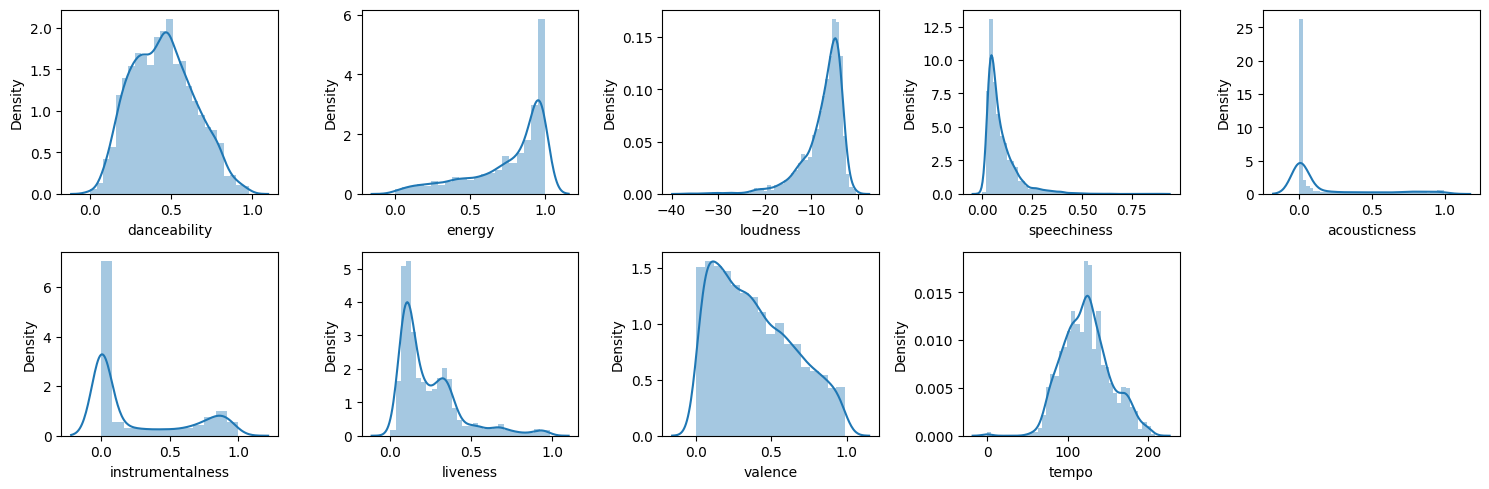

In [7]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()


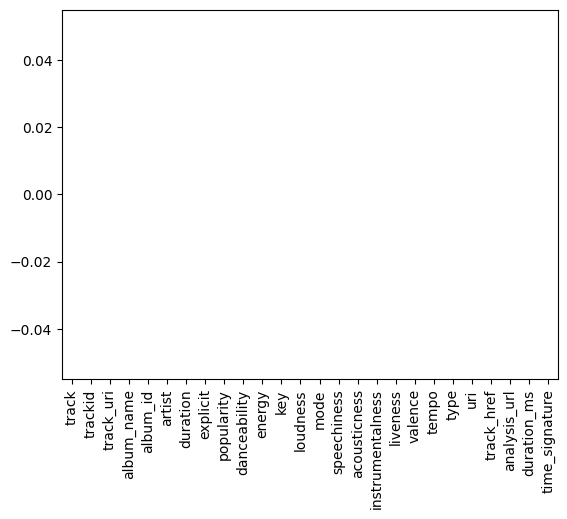

In [8]:
tracks.isnull().sum().plot.bar()
plt.show()


In [9]:
tracks['track'].nunique(), tracks.shape


(2717, (2805, 26))

In [10]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['track'], keep='first', inplace=True)


In [11]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['type'])


In [12]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)


In [24]:
def get_similarities(song_name, data):

# Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
  num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()

# We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
	  name = row['name']

	# Getting vector for current song.
	  text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
	  num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()

	# Calculating similarities for text as well as numeric features
	  text_sim = cosine_similarity(text_array1, text_array2)[0][0]
	  num_sim = cosine_similarity(num_array1, num_array2)[0][0]
	  sim.append(text_sim + num_sim)

  return sim


In [37]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def get_similarities(song_name, data, song_vectorizer):
    # Getting vector for the input song.
    text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
    num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()

    # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
        name = row['name']

        # Getting vector for current song.
        text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
        num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()

        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)

    return sim


In [39]:
def recommend_similar_songs(song_name, data, song_vectorizer, top_n=5):
    similarities = get_similarities(song_name, data, song_vectorizer)
    sim_df = pd.DataFrame({'name': data['name'], 'similarity': similarities})
    sim_df_sorted = sim_df.sort_values(by='similarity', ascending=False)

    # Exclude the input song from recommendations
    sim_df_sorted = sim_df_sorted[sim_df_sorted['name'] != song_name]

    # Select top N similar songs
    top_n_songs = sim_df_sorted.head(top_n)

    return top_n_songs
